# 📝 Exercise M6.04

The aim of the exercise is to get familiar with the histogram
gradient-boosting in scikit-learn. Besides, we will use this model within a
cross-validation framework in order to inspect internal parameters found via
grid-search.

We will use the California housing dataset.

In [58]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

In [59]:
target

0        452.6
1        358.5
2        352.1
3        341.3
4        342.2
         ...  
20635     78.1
20636     77.1
20637     92.3
20638     84.7
20639     89.4
Name: MedHouseVal, Length: 20640, dtype: float64

First, create a histogram gradient boosting regressor. You can set the trees
number to be large, and configure the model to use early-stopping.

In [60]:
from sklearn.ensemble import HistGradientBoostingRegressor

hist_gradient_boosting = HistGradientBoostingRegressor(max_iter=1000, early_stopping=True)


We will use a grid-search to find some optimal parameter for this model. In
this grid-search, you should search for the following parameters:

* `max_depth: [3, 8]`;
* `max_leaf_nodes: [15, 31]`;
* `learning_rate: [0.1, 1]`.

Feel free to explore the space with additional values. Create the grid-search
providing the previous gradient boosting instance as the model.

In [61]:
from sklearn.model_selection import GridSearchCV

param_distributions = {
    "max_iter": [3, 8],
    "max_leaf_nodes": [15, 31],
    "learning_rate": [0.01, 1],
}

search_cv = GridSearchCV(
    hist_gradient_boosting, 
    param_grid=param_distributions
)



Finally, we will run our experiment through cross-validation. In this regard,
define a 5-fold cross-validation. Besides, be sure to shuffle the data.
Subsequently, use the function `sklearn.model_selection.cross_validate` to run
the cross-validation. You should also set `return_estimator=True`, so that we
can investigate the inner model trained via cross-validation.

In [62]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=0)
cv_results = cross_validate(
    search_cv,
    data,
    target,
    cv=cv,
    return_estimator=True,
)


In [63]:
cv_results

{'fit_time': array([1.1249814 , 1.08309793, 1.09750605, 1.04170513, 1.05165839]),
 'score_time': array([0.00100613, 0.00620008, 0.00086093, 0.00099754, 0.        ]),
 'estimator': [GridSearchCV(estimator=HistGradientBoostingRegressor(early_stopping=True,
                                                       max_iter=1000),
               param_grid={'learning_rate': [0.01, 1], 'max_iter': [3, 8],
                           'max_leaf_nodes': [15, 31]}),
  GridSearchCV(estimator=HistGradientBoostingRegressor(early_stopping=True,
                                                       max_iter=1000),
               param_grid={'learning_rate': [0.01, 1], 'max_iter': [3, 8],
                           'max_leaf_nodes': [15, 31]}),
  GridSearchCV(estimator=HistGradientBoostingRegressor(early_stopping=True,
                                                       max_iter=1000),
               param_grid={'learning_rate': [0.01, 1], 'max_iter': [3, 8],
                           'max_leaf_node

Now that we got the cross-validation results, print out the mean and standard
deviation score.

In [64]:
print(f'average test score : ${cv_results["test_score"].mean()}')
print(f'std test score : ${cv_results["test_score"].std()}')

average test score : $0.7597079803254034
std test score : $0.018067307635718226


In [65]:
vars(cv_results["estimator"][0])

{'scoring': None,
 'estimator': HistGradientBoostingRegressor(early_stopping=True, max_iter=1000),
 'n_jobs': None,
 'refit': True,
 'cv': None,
 'verbose': 0,
 'pre_dispatch': '2*n_jobs',
 'error_score': nan,
 'return_train_score': False,
 'param_grid': {'max_iter': [3, 8],
  'max_leaf_nodes': [15, 31],
  'learning_rate': [0.01, 1]},
 'multimetric_': False,
 'best_index_': 5,
 'best_score_': 0.586707132235113,
 'best_params_': {'learning_rate': 1, 'max_iter': 3, 'max_leaf_nodes': 31},
 'best_estimator_': HistGradientBoostingRegressor(early_stopping=True, learning_rate=1, max_iter=3),
 'refit_time_': 0.02678370475769043,
 'feature_names_in_': array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
        'AveOccup', 'Latitude', 'Longitude'], dtype=object),
 'scorer_': <sklearn.metrics._scorer._PassthroughScorer at 0x17812d80670>,
 'cv_results_': {'mean_fit_time': array([0.02067242, 0.02072248, 0.0264823 , 0.03432555, 0.02060928,
         0.02172332, 0.02303886, 0.03221464]

Then inspect the `estimator` entry of the results and check the best
parameters values. Besides, check the number of trees used by the model.

In [66]:
for est in cv_results["estimator"]:
    print(vars(est))
    print(est.best_params_)
    print(est.best_estimator_.n_iter_)

{'scoring': None, 'estimator': HistGradientBoostingRegressor(early_stopping=True, max_iter=1000), 'n_jobs': None, 'refit': True, 'cv': None, 'verbose': 0, 'pre_dispatch': '2*n_jobs', 'error_score': nan, 'return_train_score': False, 'param_grid': {'max_iter': [3, 8], 'max_leaf_nodes': [15, 31], 'learning_rate': [0.01, 1]}, 'multimetric_': False, 'best_index_': 5, 'best_score_': 0.586707132235113, 'best_params_': {'learning_rate': 1, 'max_iter': 3, 'max_leaf_nodes': 31}, 'best_estimator_': HistGradientBoostingRegressor(early_stopping=True, learning_rate=1, max_iter=3), 'refit_time_': 0.02678370475769043, 'feature_names_in_': array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'], dtype=object), 'scorer_': <sklearn.metrics._scorer._PassthroughScorer object at 0x0000017812D80670>, 'cv_results_': {'mean_fit_time': array([0.02067242, 0.02072248, 0.0264823 , 0.03432555, 0.02060928,
       0.02172332, 0.02303886, 0.03221464]), 'std_fit_t

In [67]:
# print(vars(cv_results["estimator"][0].cv_results_))
print(cv_results["estimator"][0].cv_results_)

{'mean_fit_time': array([0.02067242, 0.02072248, 0.0264823 , 0.03432555, 0.02060928,
       0.02172332, 0.02303886, 0.03221464]), 'std_fit_time': array([0.00462495, 0.00218255, 0.00264047, 0.00648745, 0.00301099,
       0.00145593, 0.00174882, 0.00589056]), 'mean_score_time': array([0.00363379, 0.        , 0.00227489, 0.00145063, 0.00151005,
       0.0018271 , 0.00234232, 0.00258541]), 'std_score_time': array([0.00448707, 0.        , 0.00064044, 0.00077473, 0.00090279,
       0.00228911, 0.00288058, 0.00200318]), 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.01, 1, 1, 1, 1],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_iter': masked_array(data=[3, 3, 8, 8, 3, 3, 8, 8],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_leaf_nodes': masked_array(data=[15, 31, 15, 31, 15, 31, 15, 31],
            

Inspect the results of the inner CV for each estimator of the outer CV.
Aggregate the mean test score for each parameter combination and make a box
plot of these scores.

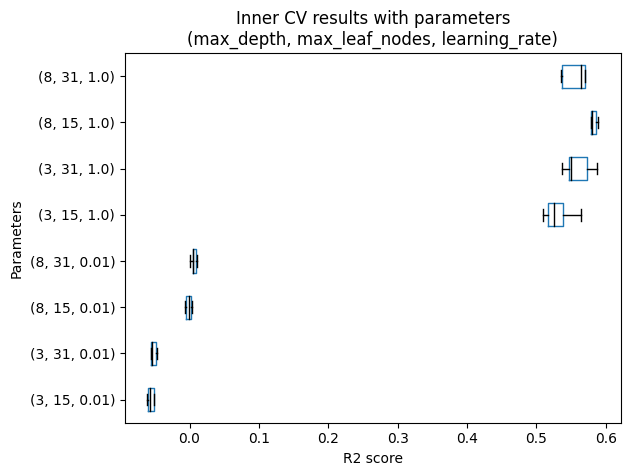

In [68]:
import pandas as pd

index_columns = [f"param_{name}" for name in param_distributions.keys()]
columns = index_columns + ["mean_test_score"]

inner_cv_results = []
for cv_idx, estimator in enumerate(cv_results["estimator"]):
    search_cv_results = pd.DataFrame(estimator.cv_results_)
    search_cv_results = search_cv_results[columns].set_index(index_columns)
    search_cv_results = search_cv_results.rename(
        columns={"mean_test_score": f"CV {cv_idx}"}
    )
    inner_cv_results.append(search_cv_results)
inner_cv_results = pd.concat(inner_cv_results, axis=1).T

import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
inner_cv_results.plot.box(vert=False, color=color)
plt.xlabel("R2 score")
plt.ylabel("Parameters")
_ = plt.title(
    "Inner CV results with parameters\n"
    "(max_depth, max_leaf_nodes, learning_rate)"
)
